In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif,VarianceThreshold
from sklearn.base import TransformerMixin , BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree

In [89]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
data.describe(include=["O"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [93]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [94]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [95]:
data["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [96]:
discrete=data.select_dtypes(include=["int64"]).columns
discrete

Index(['age', 'children'], dtype='object')

In [97]:
continous=data.select_dtypes(include=["float64"]).columns
continous

Index(['bmi', 'charges'], dtype='object')

In [98]:
objected=data.select_dtypes("object").columns
objected

Index(['sex', 'smoker', 'region'], dtype='object')

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_12144\172871699.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["age"],shade=True)


<AxesSubplot:xlabel='age', ylabel='Density'>

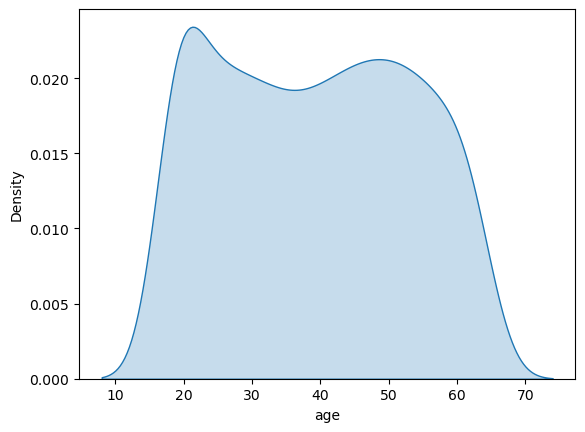

In [99]:
sns.kdeplot(data["age"],shade=True)

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_12144\902640600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bmi"])


<AxesSubplot:xlabel='bmi', ylabel='Density'>

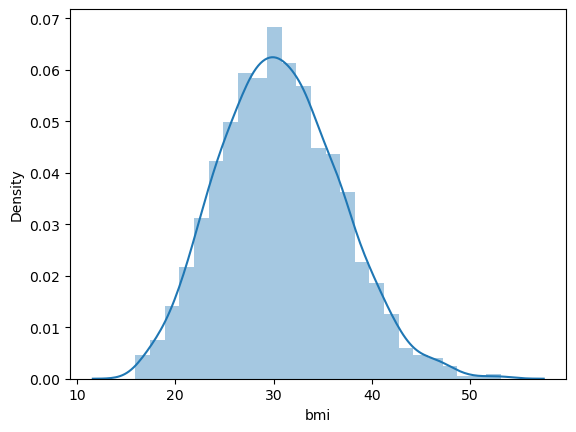

In [100]:
sns.distplot(data["bmi"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_12144\1530386084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["children"])


<AxesSubplot:xlabel='children', ylabel='Density'>

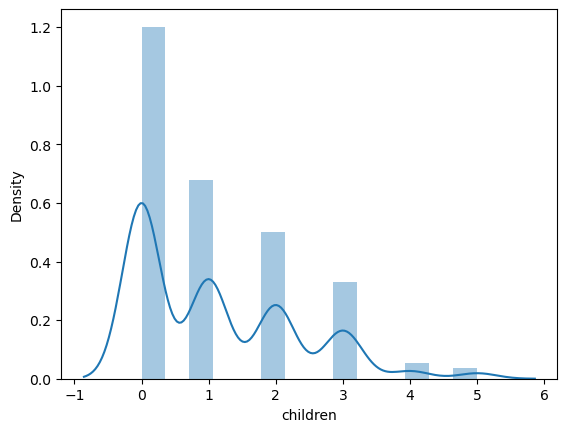

In [101]:
sns.distplot(data["children"])

<AxesSubplot:xlabel='sex'>

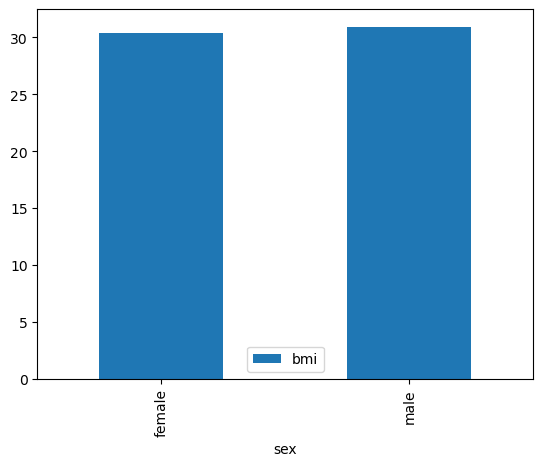

In [102]:
data.groupby(["sex"])["bmi"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<AxesSubplot:ylabel='charges'>

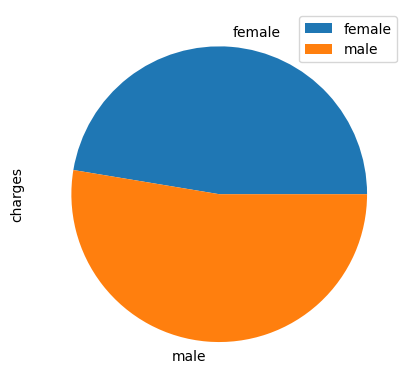

In [103]:
data.groupby(["sex"])["charges"].mean().sort_values(ascending=True).plot(kind="pie",legend=True)

age
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
23    AxesSubplot(0.125,0.11;0.775x0.77)
24    AxesSubplot(0.125,0.11;0.775x0.77)
25    AxesSubplot(0.125,0.11;0.775x0.77)
26    AxesSubplot(0.125,0.11;0.775x0.77)
27    AxesSubplot(0.125,0.11;0.775x0.77)
28    AxesSubplot(0.125,0.11;0.775x0.77)
29    AxesSubplot(0.125,0.11;0.775x0.77)
30    AxesSubplot(0.125,0.11;0.775x0.77)
31    AxesSubplot(0.125,0.11;0.775x0.77)
32    AxesSubplot(0.125,0.11;0.775x0.77)
33    AxesSubplot(0.125,0.11;0.775x0.77)
34    AxesSubplot(0.125,0.11;0.775x0.77)
35    AxesSubplot(0.125,0.11;0.775x0.77)
36    AxesSubplot(0.125,0.11;0.775x0.77)
37    AxesSubplot(0.125,0.11;0.775x0.77)
38    AxesSubplot(0.125,0.11;0.775x0.77)
39    AxesSubplot(0.125,0.11;0.775x0.77)
40    AxesSubplot(0.125,0.11;0.775x0.77)
41    AxesSubplot(0.125,0.11;0.775x0.77)
42    AxesSu

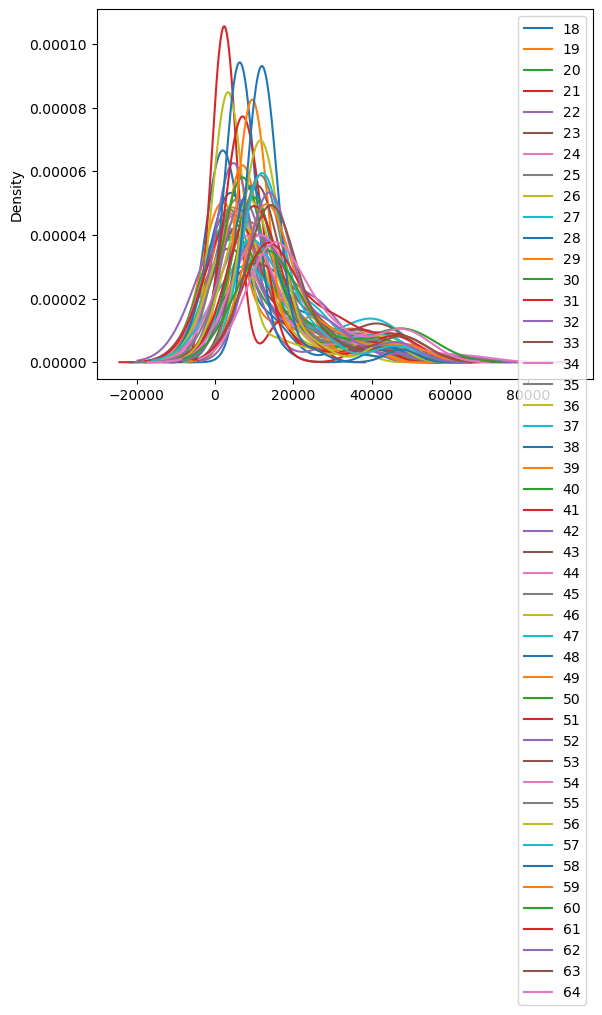

In [104]:
data.groupby(["age"])["charges"].plot(kind="kde",legend=True)

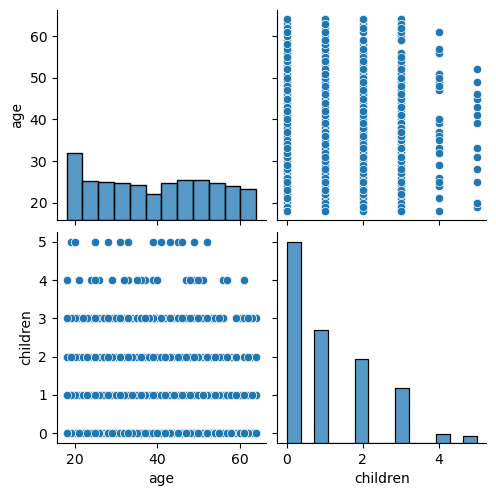

In [105]:
sns.pairplot(data.select_dtypes(include=["int64"]))

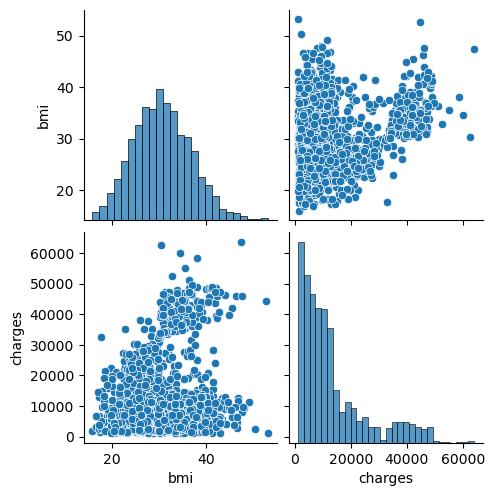

In [106]:
sns.pairplot(data.select_dtypes(include=["float64"]))

In [107]:
data.isna().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [108]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age'>

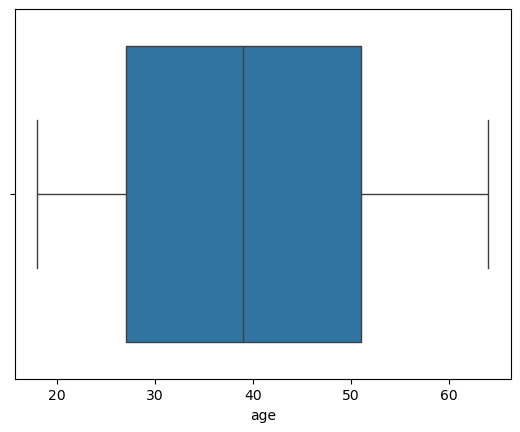

In [109]:
# check the outlier from statistical step we found that age , charges:

sns.boxplot(x=data["age"])

#then there are not outlier in age column

<AxesSubplot:xlabel='age'>

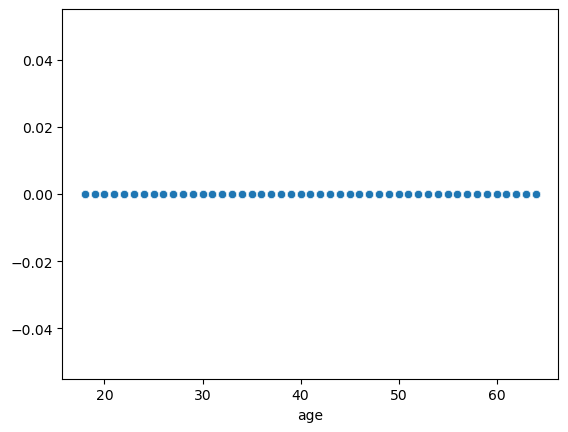

In [110]:
sns.scatterplot(x=data["age"],y=np.zeros_like(data["age"]))

<AxesSubplot:xlabel='charges'>

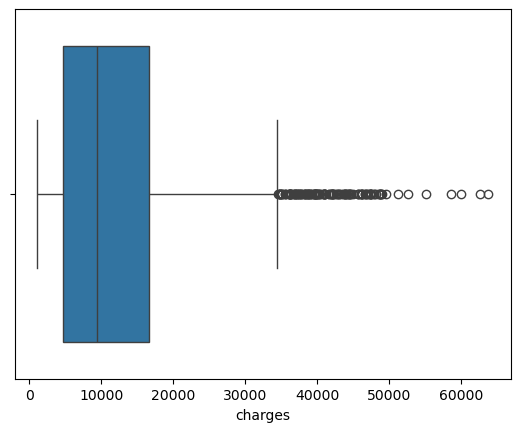

In [111]:
# check if there outlier in charges:

sns.boxplot(x=data["charges"])

# then there are outliers

<AxesSubplot:xlabel='charges'>

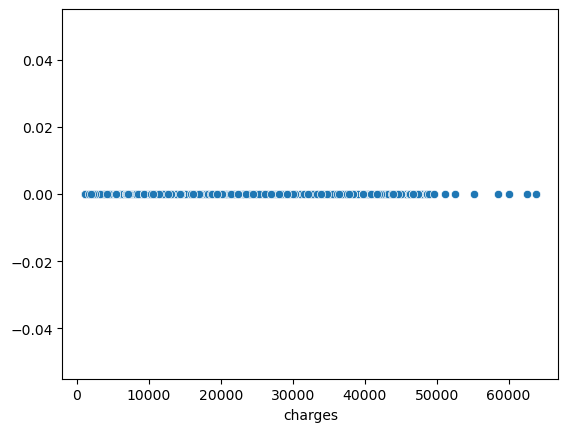

In [112]:
sns.scatterplot(x=data["charges"],y=np.zeros_like(data["charges"]))

In [113]:
# calc the outliers in the charges column:

Q1,Q3=data["charges"].quantile([0.25,0.75])

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

outliers=[]

for x in data["charges"]:
    if((x<low_limit) or (x>upper_limit)):
        outliers.append(x)

In [114]:
print("Q1_charges=",Q1)
print("Q3_charges=",Q3)
print("low_limit_charges=",low_limit)
print("upper_limit_charges=",upper_limit)
print("outliers=",outliers)


Q1_charges= 4740.28715
Q3_charges= 16639.912515
low_limit_charges= -13109.1508975
upper_limit_charges= 34489.350562499996
outliers= [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.8

In [115]:
print(len(outliers))

139


In [116]:
num_cols=data.select_dtypes("number").columns

In [117]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([0, 1, 2, 3], dtype=int64)

In [118]:
num_cols[selector.get_support(indices=True)]

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [119]:
df=data.T
duplicates_features=df.duplicated().sum()
print(duplicates_features)


0


In [120]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [121]:
# the most categorical features are correlated:

from sklearn.feature_selection import SelectKBest ,f_classif

fs=SelectKBest(score_func=f_classif,k=3)
fs.fit(data.drop(columns="charges").select_dtypes("number").fillna(0),data["charges"])



G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


SelectKBest(k=3)

In [122]:
print(["{:10f}".format(p) for p in fs.pvalues_])


['  0.000000', '  0.000000', '  0.000000']


In [123]:
print(["{:10f}".format(p) for p in fs.scores_])

['       inf', '       inf', '       inf']


In [124]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="charges").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_score.columns=["pvalues_features","scores_features","input"]
feature_score

,pvalues_features,scores_features,input
0,0.0,inf,age
1,0.0,inf,bmi
2,0.0,inf,children


In [125]:
# calc correlation:
data.select_dtypes("number").corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [126]:
data.select_dtypes("number").corr(method="pearson")

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [127]:
data.select_dtypes("number").corr(method="spearman")

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [128]:
data.select_dtypes("number").corr(method="kendall")

,age,bmi,children,charges
age,1.000000,0.073273,0.043253,0.475302
bmi,0.073273,1.000000,0.011562,0.082524
children,0.043253,0.011562,1.000000,0.103107
charges,0.475302,0.082524,0.103107,1.000000


Text(0.5, 1.0, 'Heatmap correlation ')

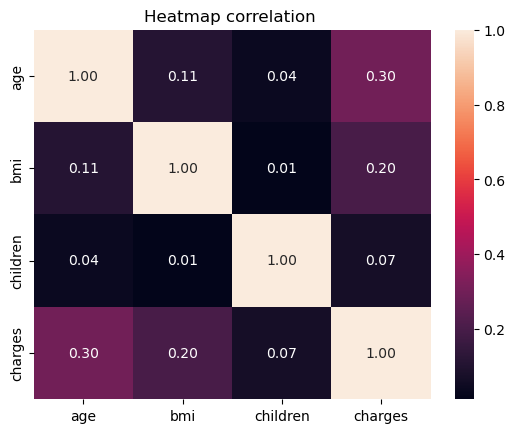

In [129]:
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("Heatmap correlation ")

In [130]:
# descison Tree:

category_features=["smoker","sex","region"]
data=pd.get_dummies(data,columns=category_features)
data

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,True,False,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,False,True,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [134]:
# Divie the data into x,y:

x=data.drop("charges",axis=1)
y=data["charges"]

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train

,age,bmi,children,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
332,61,31.160,0,True,False,True,False,False,True,False,False
355,46,27.600,0,True,False,False,True,False,False,False,True
138,54,31.900,3,True,False,True,False,False,False,True,False
381,55,30.685,0,False,True,False,True,True,False,False,False
292,25,45.540,2,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,True,False,False,True,True,False,False,False
860,37,47.600,2,False,True,True,False,False,False,False,True


In [140]:
model=tree.DecisionTreeClassifier(max_depth=4,random_state=42)
     

In [143]:
model.fit(x_train,y_train)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: Unknown label type: 'continuous'